In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/application_train.csv')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114497,232771,0,Cash loans,F,Y,N,3,112500.0,342000.0,20794.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
114498,232772,0,Cash loans,M,Y,Y,2,202500.0,835380.0,31086.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
114499,232773,0,Cash loans,M,N,Y,0,103500.0,203760.0,11826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114500,232774,0,Cash loans,F,N,N,1,180000.0,328405.5,23485.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_YEARS', 'AGE_GROUP'],
      dtype='object', length=124)

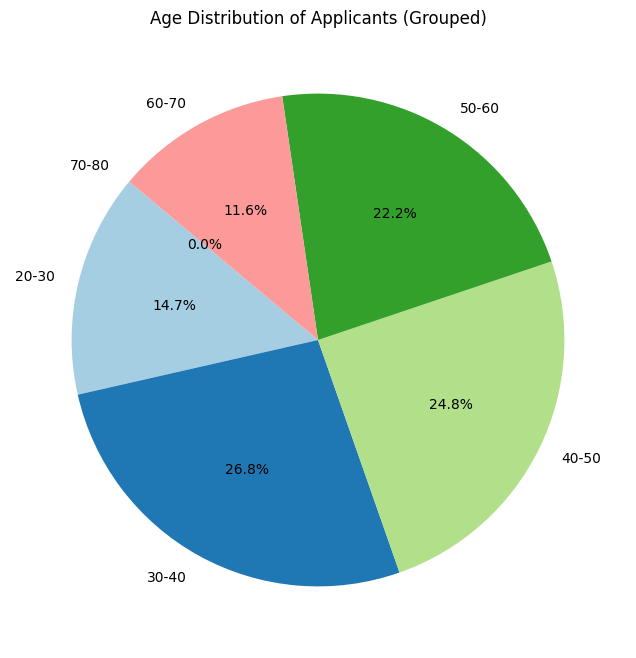

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365       ##create a column of age_years in this
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False) ####create a column of age_group in this
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Age Distribution of Applicants (Grouped)')
plt.show()


/tmp/ipython-input-14-3492155474.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean()


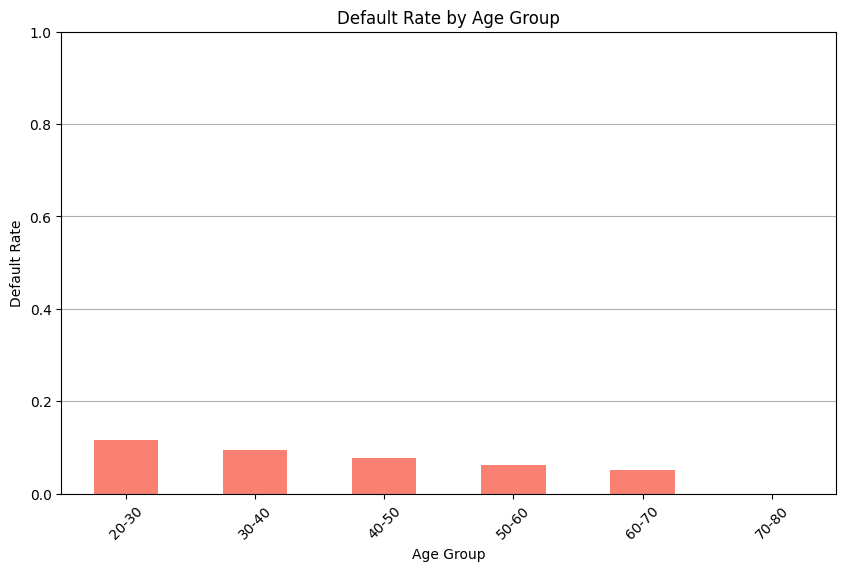

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)
default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean()
plt.figure(figsize=(10, 6))
default_rate_by_age.plot(kind='bar', color='salmon')
plt.title('Default Rate by Age Group')
plt.ylabel('Default Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.show()


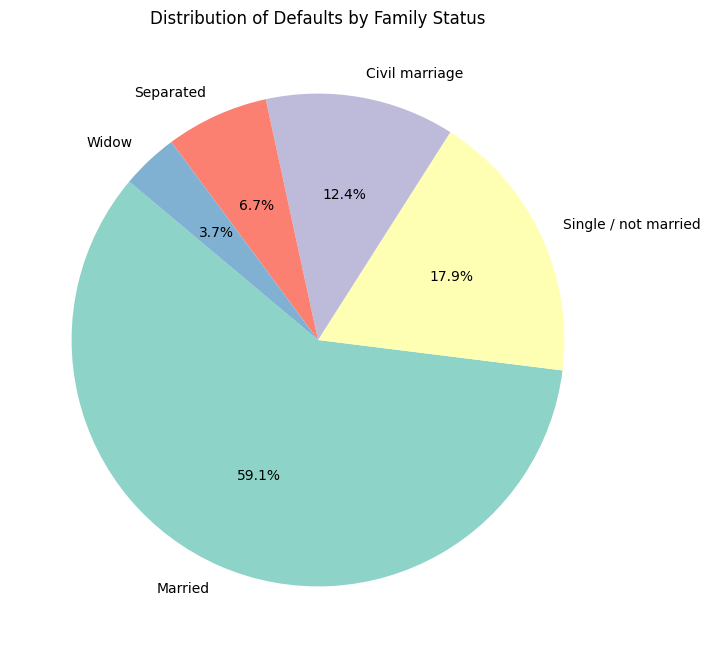

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
default_df = df[df['TARGET'] == 1]
family_default_counts = default_df['NAME_FAMILY_STATUS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(family_default_counts,
        labels=family_default_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)
plt.title('Distribution of Defaults by Family Status')
plt.show()


/tmp/ipython-input-25-2802375699.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['TARGET'] == 0], x='AMT_INCOME_TOTAL', label='No Default (TARGET=0)', shade=True)
/tmp/ipython-input-25-2802375699.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['TARGET'] == 1], x='AMT_INCOME_TOTAL', label='Defaulted (TARGET=1)', shade=True, color='red')


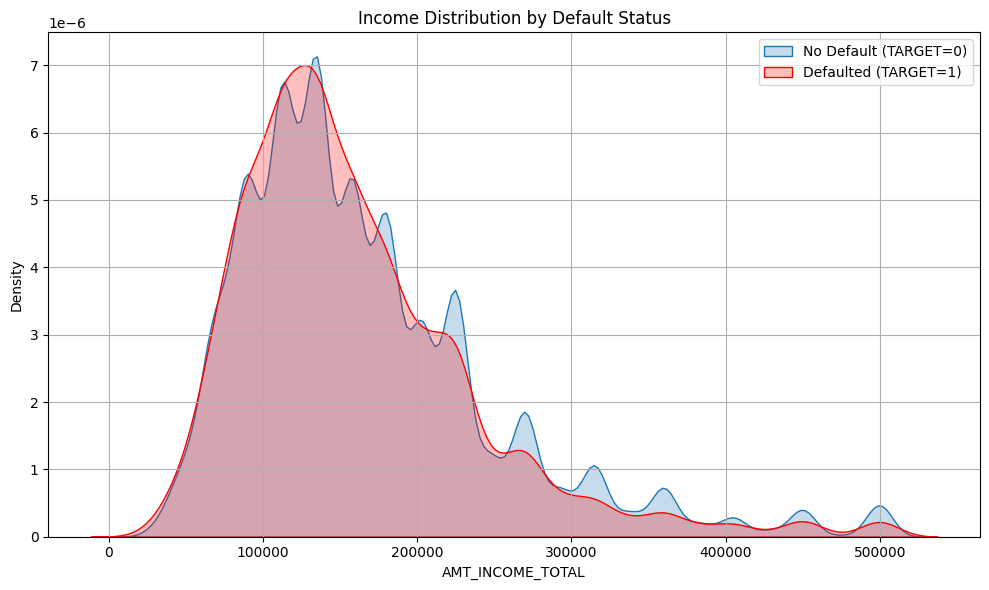

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['TARGET'] == 0], x='AMT_INCOME_TOTAL', label='No Default (TARGET=0)', shade=True)
sns.kdeplot(data=df[df['TARGET'] == 1], x='AMT_INCOME_TOTAL', label='Defaulted (TARGET=1)', shade=True, color='red')

plt.title('Income Distribution by Default Status')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


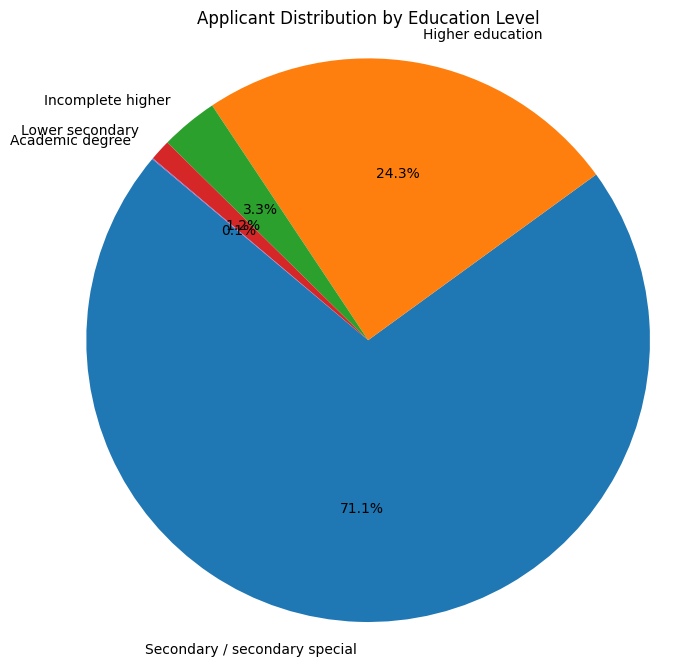

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
education_counts = df['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Applicant Distribution by Education Level')
plt.axis('equal')
plt.show()


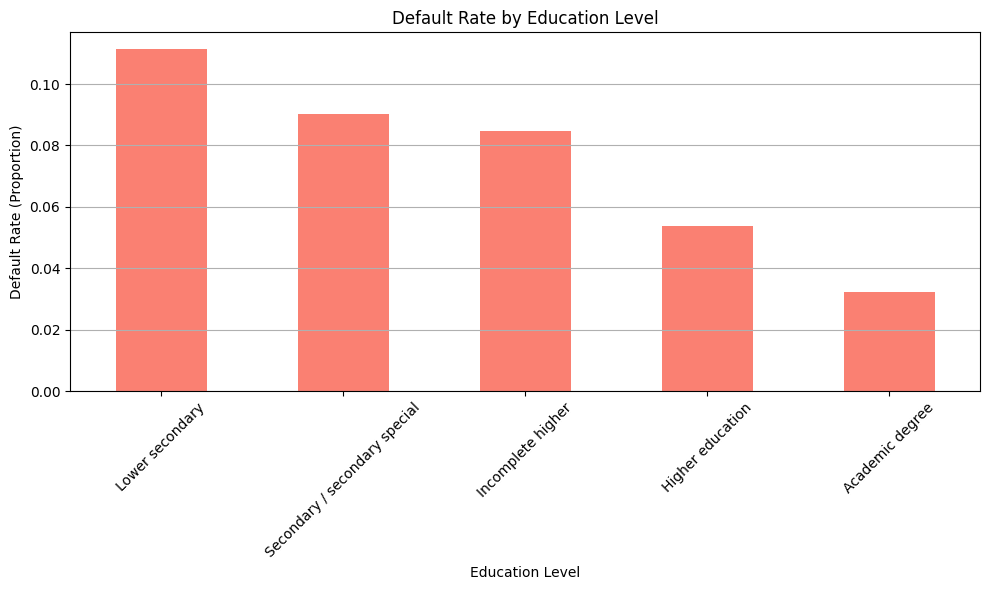

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
default_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
default_rates.plot(kind='bar', color='salmon')
plt.title('Default Rate by Education Level')
plt.ylabel('Default Rate (Proportion)')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



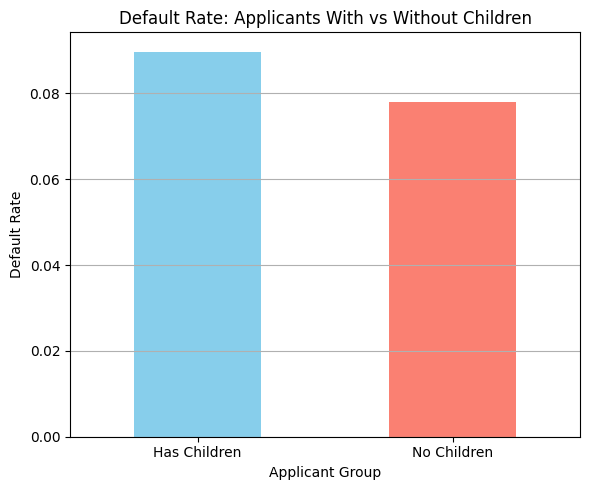

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['HAS_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: 'No Children' if x == 0 else 'Has Children')
child_default_rate = df.groupby('HAS_CHILDREN')['TARGET'].mean()
plt.figure(figsize=(6, 5))
child_default_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Default Rate: Applicants With vs Without Children')
plt.ylabel('Default Rate')
plt.xlabel('Applicant Group')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


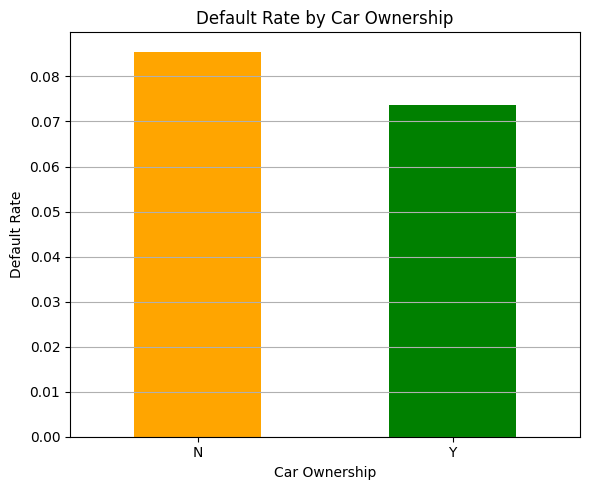

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
car_default_rate = df.groupby('FLAG_OWN_CAR')['TARGET'].mean()
plt.figure(figsize=(6, 5))
car_default_rate.plot(kind='bar', color=['orange', 'green'])
plt.title('Default Rate by Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
labels=['No Car', 'Owns Car']  # Assuming 'N' and 'Y'
plt.grid(axis='y')
plt.tight_layout()
plt.show()


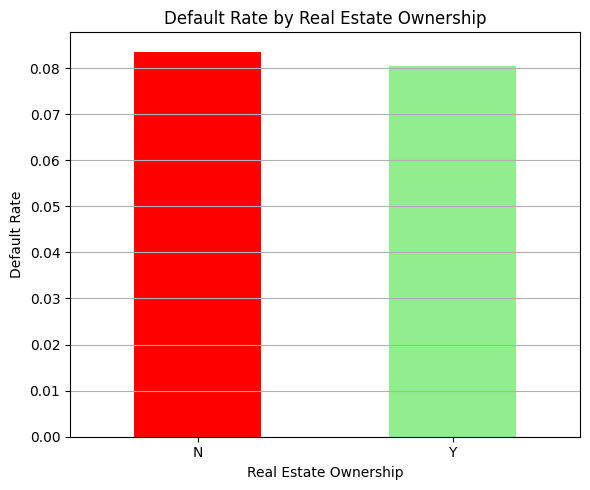

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
realty_default_rate = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
plt.figure(figsize=(6, 5))
realty_default_rate.plot(kind='bar', color=['red', 'lightgreen'])
plt.title('Default Rate by Real Estate Ownership')
plt.xlabel('Real Estate Ownership')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
labels=['No Property', 'Owns Property'] # Assuming 'N' and 'Y'
plt.grid(axis='y')
plt.tight_layout()
plt.show()


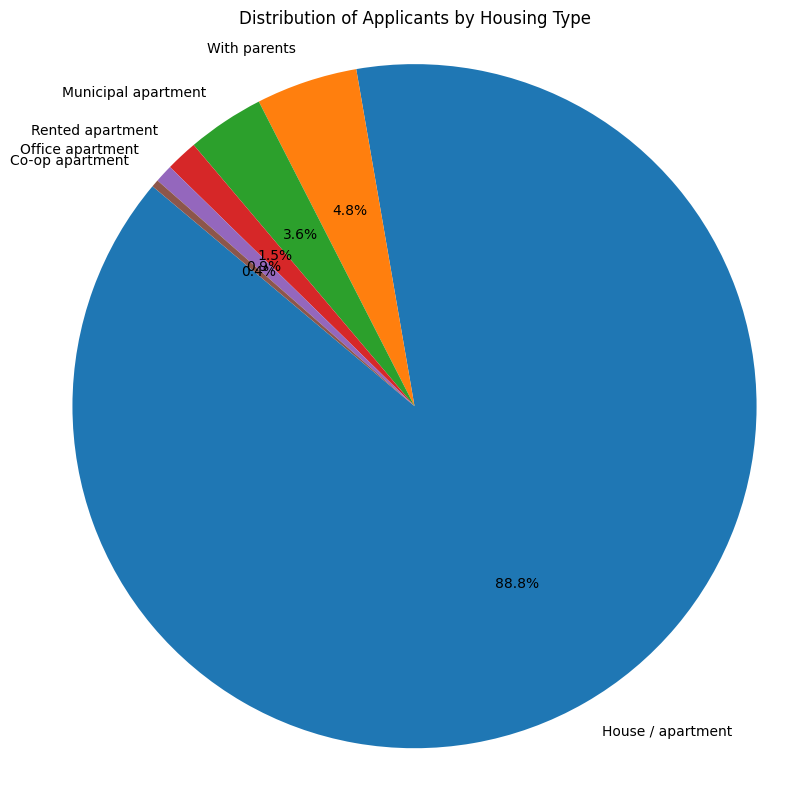

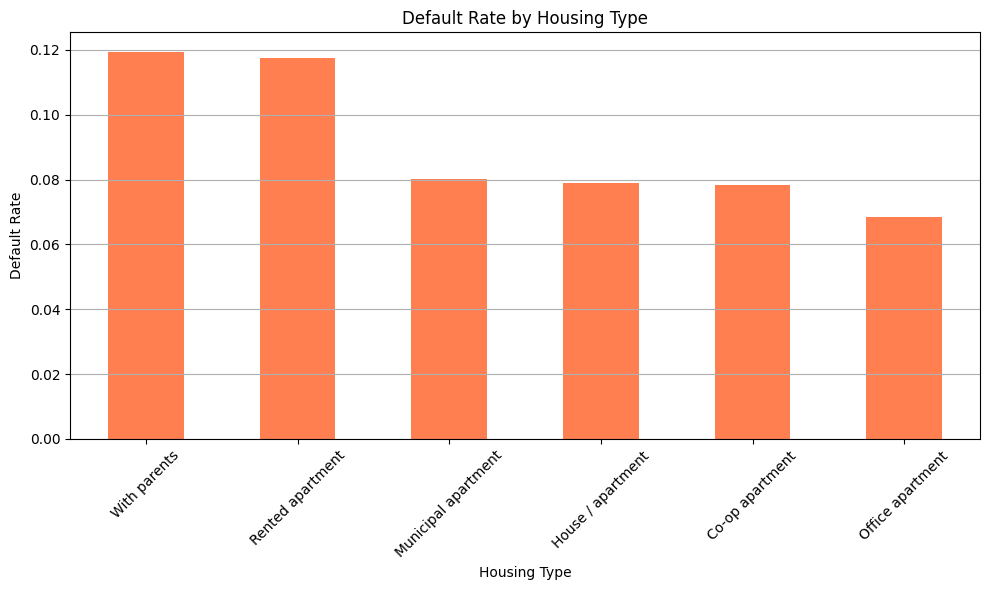

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
housing_counts = df['NAME_HOUSING_TYPE'].value_counts()
housing_default_rate = df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Applicants by Housing Type')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
housing_default_rate.plot(kind='bar', color='coral')
plt.title('Default Rate by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
